Ao invés de usar a função fetch_mldata() (que está absoleta), eu irei usar a função fetch_openml(). No entanto, ela retorna o dataset Mnist não classificado, enquando que o fetch_mldata() retornou o conjunto de dados classificado por destino (o conjunto de treinamento e de teste foram classificados separadamente). Em geral, isso é bom, mas se eu quiser obter os mesmos resultados de antes, precisarei classificar o conjunto de dados usando a seguinte função:

In [72]:
#Para plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import numpy as np
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [3]:
####### CARREGANDO O DATASET########
#Código antigo. A função fetch_mldata() está absoleto desde o Scikit-Learn 0.20. No lugar dessa função eu tenho que usar fetch_openml()
#from sklearn.datasets import fetch_mldata
#minist = fetch_mldata('MNIST original')
#mnist

#Código novo. Usando a nova função fetch_openml()

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([0, 0, 0, ..., 9, 9, 9], dtype=int8),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel

In [4]:
mnist.data.shape

(70000, 784)

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
28*28

784

Há 70,000 imagens, e cada imagem tem 784 features (características, recursos). Isso se deve ao fato de cada imagem é 28 x 28 pixels, e cada feature representa a intensidade de um pixel, de 0 (branco) a 255 (preto). Para olhar um dígito do dataset. Eu preciso pegar o vetor de feature de uma instância, remodelá-lo para uma matriz 28 x 28 e exibí-lo usando a função imshow() do Matplotlib: 

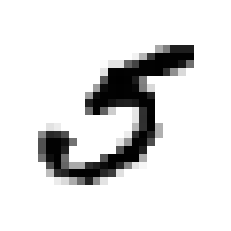

In [9]:
#%matplotlib inline
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#Como eu já importei essas libs na primeira célula, eu não preciso mais importar aqui. 

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

#save_fig("some_digit_plot") # seu eu quisesse salvar a imagem #
plt.show()

In [73]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [10]:
y[36000]

5

In [11]:
# Código extra para mostrar uma fileira (row) de 10 para cada dígito

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

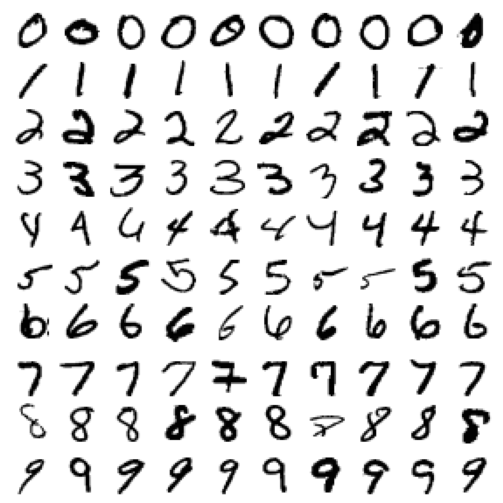

In [12]:

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
#save_fig("more_digits_plot")
plt.show()

**Obs:** Sempre tem que criar um conjunto de teste e colocá-lo de lado antes de inspecionar os dados de perto. 
O dataset Mnist já está dividido em um conjunto de treinamento(os primeiros 60.000 imagens) e um conjunto de teste (as últimas 10.000 imagens): 

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Agora eu vou embaralhar o dataset, isso garantirá que todas as "dobras" da cross-validation serão semelhantes, ou seja, que não falte alguns dígitos em alguma "dobra ou fold". 

**Cross Validation**: é uma técnica muito utilizada para avaliação de desempenho de modelos de aprendizado de máquina. Consiste em particionar os dados em conjuntos (partes), onde um conjunto é utilizado para treino e outro conjunto para teste e avaliação do desempenho do modelo. A utilização da CV tem altas chances de detectar se o seu modelo está sobreajustado aos seus dados de treinamento, ou seja, sofrendo ***Overfitting***.

In [14]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

Agora vou tentar identificar apenas um dígito, por exemplo, o número 5. Este "detector de 5" será um exemplo de ***classificador binário***, capaz de distinguir entre apenas duas classes, 5 e não-5. A seguir vou criar os vetores de destino para esta tarefa de classificação:

In [15]:
y_train_5 = (y_train == 5) #Verdadeiro para todos os 5. Falso para todos os outros dígitos.
y_test_5 = (y_test == 5)

Agora eu irei escolher um classificador e treiná-lo. Irei usar um classificador ***Stochastic Gradient Descent (SGD)***, usando a classe ***SGDClassifier*** do Scikit-Learn. Este classificador tem a vantagem de ser capaz de lidar com conjuntos de dados muito grandes com eficiência. Isso ocorre em parte porque o SGD lida com instâncias de treinamento de forma independente, uma de cada vez. A seguir vou criar um ***SGDClassifier*** e treiná-lo em todo o conjunto de treinamento: 

**Obs:** Como alguns parâmetros tem um valor diferente em versões futuras do Sckit-Learn, e avisos são emitidos se não forem definidos explicitamente. É por isso que defini ***max_iter=5*** e ***tol=-np.infty***, para eu obter os mesmos resultados do livro e evitar os avisos. 

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

**Obs:** O ***SGDClassifier*** depende da aleatoriedade durante o treinamento (por isso o nome "estocástico"). Ou seja, se quiser resultados reproduzíveis, deve-se definir o parâmetro ***random_state***. 

Agora eu posso usá-lo para detectar imagens do número 5:

In [17]:
sgd_clf.predict([some_digit])

array([ True])

**Obs:** O classificador adivinhou que a imagem representa um 5 (true). Ele acertou. Agora, vou avaliar o desempenho deste modelo:

# Performance Measures

Uma boa maneira de avaliar um modelo é usar a cross-validation:

**Obs:** Eu precisarei de mais controle sobre o processo de **cross validation** do que o ***cross_val_score()*** e funções semelhantes fornecem. Nesses casos, eu mesmo posso implementar a cross-validation. O código a seguir faz praticamente a mesma coisa que o código ***cross_val_score()*** anterior  e imprime o mesmo resultado:

**Obs:** A classe StratifiedKFold executa a amostragem estratificada para produzir "dobras" que contêm uma representativa de cada classe. A cada iteração, o código cria um clone do classificador, treina esse clone nas dobras de treinamento e faz previsões na dobra de teste. Em seguida, ele conta o número de previsões corretas e produz a proporção de previsões corretas.

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # imprime a predição na tela


0.93045
0.95805
0.9664


Agora vou usar a função ***cross_val_score()*** para avaliar o modelo **SGDClassifier** usando K-fold cross-validation, com três dobras. Lembrando que a K-fold cross-validation significa dividir o conjunto de treinament em dobras K (neste caso, três) e, em seguida, fazer previsões e avaliá-los em cada dobra usando um modelo treinado nas dobras restantes: 

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.94955, 0.9354 , 0.9519 ])

Como é possível ver na célula acima, a acurácia alcançou mais de 95%. 

A seguir vamos dar uma olhada em um classificador "muito idiota" que apenas classifica cada imagem na classe "not-5":

In [20]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

A seguir podemos ver a precisão desse modelo:


In [21]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.91   , 0.9077 ])

Como é possível observar, teve mais de 90% de precisão. Isso ocorre simplesmente porque apenas cerca de 10% das imagens são 5, então se você sempre adivinhar que uma imagem não é um 5, você estará certo cerca de 90% das vezes. LOL

Isso demonstra porque a precisão geralmente não é a medida de desempenho preferida para classificadores, especialmente quando está lidando com conjuntos de dados distorcidos (ou seja, quando algumas classes são muito mais frequentes do que outras). 

# Confusion Matrix

Uma maneira muito melhor de avaliar o desempenho de um classificador é examinar a matriz de confusão. A ideia geral é contar o número de vezes que instâncias da classe A são classificadas como classe B. Por exemplo, para saber o número de vezes que o classificador confundiu imagens de 5 com 3, você procuraria na 5ª linha e na 3ª coluna da matriz de confusão.
Para calcular a matriz de confusão, primeiro é necessário ter um conjunto de previsões, para que possam ser comparados aos alvos reais. Eu poderia fazer previsões sobre o conjunto de teste, mas vou mantê-lo intocado por enquanto (para que eu possa usar o conjunto de teste apenas no final do seu projeto, assim que tiver um classificador que está pronto para lançar). Em vez disso, vou usar a função ***cross_val_predict ()***:

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

**Obs:** Assim como a função ***cross_val_score()***, a ***cross_val_predict()*** realiza a K-fold cross-validation, mas em vez de retornar as pontuações de avaliação, ela retorna as previsões feitas em cada dobra de teste. Isso significa que você obtém uma previsão limpa para cada instância no conjunto de treinamento ("limpo" significa que a previsão é feita por um modelo que nunca viu os dados durante o treinamento).

Agora está pronto para obter a matriz de confusão usando a função ***confused_matrix()***. Basta passar as classes alvo ***(y_train_5)*** e as classes previstas ***(y_train_pred)***. 

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52022,  2557],
       [  706,  4715]], dtype=int64)

**Obs:** Cada **linha** em uma matriz de confusão representa uma **classe real**, enquanto cada **coluna** representa uma **classe prevista**. A primeira linha desta matriz considera imagens não-5 (**a classe negativa** ): 54.159 delas foram classificadas corretamente como não 5s (chamadas de negativas verdadeiras), enquanto as 420 retantes foram classificadas erroneamente como 5s (falsos positivos). A segunda linha considera as imagens de 5s (**a classe positiva**): 1.875 foram erroneamente classificadas como não 5s (**falsos negativos**), enquanto as 3.546 restantes foram classificadas corretamente como 5s (**verdadeiros positivos**). Um classificador perfeito teria apenas verdadeiros positivos e verdadeiros
negativos, então sua matriz de confusão teria valores diferentes de zero apenas em sua diagonal principal (superior esquerdo para inferior direito):

In [24]:
y_train_perfect_predictions = y_train_5

In [25]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

A matriz de confusão fornece muitas informações, mas às vezes eu posso preferir uma métrica mais concisa. Um aspecto interessante de se observar é a precisão das previsões positivas. Chamado de **precisão do classificador**. 
O Scikit-Learn fornece várias funções para calcular as métricas do classificador, incluindo **precisão e recall**:

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 4230 / (4230 + 1227)

0.6483773377337734

In [27]:
recall_score(y_train_5, y_train_pred) # == 4230 / (4230 + 1191)

0.8697657258808338

**Obs:** Quando o detector de 5 afirma que uma imagem representa 5, está correto apenas 77% (0.7751511819681144) das vezes. Além disso, ele detecta apenas 78% (0.7802988378527946) dos 5s. 

Muitas vezes, é conveniente combinar precisão e recall em uma única métrica chamada **F1 Score**, em particular se você precisar de uma maneira simples de comparar dois classificadores. A F1 Score é a média harmônica de precisão e recall. Enquanto a média regular trata todos os valores igualmente, a média harmônica dá muito mais peso aos valores baixos. Como resultado, o classificador só obterá uma pontuação alta de F1 se o recall e a precisão forem altos.

Para calcular a **F1 Score**, basta chamar a função ***f1_score()***:

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.74292917356023

**Precision/Recall Tradeoff**: 

**Threshold**:

O Scikit-Learn não permite que você defina o **threshold** (limite) diretamente, mas dá acesso às pontuações de decisão que usa para fazer previsões. Em vez de chamar o método ***predict ()*** do classificador, você pode chamar seu método ***decision_function ()***, que retorna uma pontuação para cada instância e, em seguida, fazer previsões com base nessas pontuações usando qualquer limite que você quiser:

In [29]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([92487.31998671])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_some_digit_pred

array([ True])

O **SGDClassifier** usa um limite igual a 0, então o código anterior retorna o mesmo resultado que o método ***predict ()*** (ou seja, True). Vamos aumentar o limite:

In [32]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Isso confirma que aumentar o threshold (limite) diminui a recuperação. A imagem realmente representa um 5, e o classificador o detecta quando o limite é 0, mas não o detecta quando o limite é aumentado para 200.000.

Para eu decidir qual limite usar, eu preciso obter as pontuações de todas as instâncias no conjunto de treinamento usando a função ***cross_val_predict()*** novamente, mas desta vez especificando que desejo retornar pontuações de decisão em vez de previsões.: 

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method= "decision_function")

Agora, com essas pontuações, eu posso calcular a precisão e recuperar todos os limites (threshold) possíveis usando a função ***precision_recall_curve()***:

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Agora, eu posso representar graficamente (plotar) a precisão e a recuperação (recall) do valor limite (threshold) usando o Matplotlib:

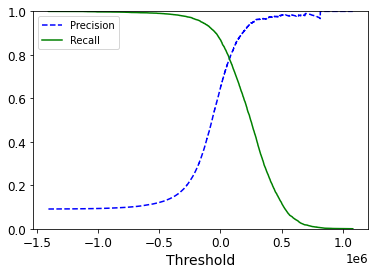

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

**Obs:** Agora eu posso simplesmente selecionar o valor limite que oferece a melhor compensação de precisão/recall para a minha tarefa. Outra maneira de selecionar uma boa compensação de precisão/recall é traçar a precisão diretamente em relação ao recall, como mostra a seguir:

In [36]:
(y_train_pred == (y_scores > 0)).all()

True

**Obs:** Então, supondo que eu decida almejar 90% de precisão. Eu olho para o primeiro gráfico (ampliando um pouco) e descubro que preciso usar um limite (threshold) de cerca de 70.000. Para fazer previsões (no conjunto de treinamento por enquanto), em vez de chamar a previsão do método classificador ***predict()***, você pode simplesmente executar este código:

In [37]:
y_train_pred_90 = (y_scores > 70000)

Então eu verifico a precisão e a recuperação (recall) dessas previsões:

In [38]:
precision_score(y_train_5, y_train_pred_90)

0.7762631770265358

In [39]:
recall_score(y_train_5, y_train_pred_90)

0.7878620180778454

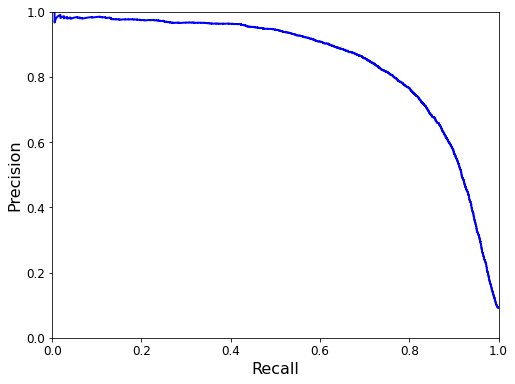

In [40]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
#save_fig("precision_vs_recall_plot")
plt.show()

# The ROC Curve

A **ROC Curve** é outras ferramenta comum usada com classificadores binários. É muito semelhante à curva de precisão/Recall curve (curva rechamada), mas em vez de traçar a precisão versus recall, a curva ROC traça a **taxa positiva verdadeira** (outro nome para recall) em relação à **taxa de falsos positivos**. o **FPR** é a proporção de ocorrências negativas classificadas incorretamente como positivas. É igual a um menos a taxa **negativa verdadeira**,
que é a proporção de instâncias negativas que são classificadas corretamente como negativas. O **TNR** também é chamado de especificidade. Portanto, a curva ROC representa a **sensibilidade** (recall) versus 1 - **especificidade**.

**Obs:** Para plotar a curva ROC, você primeiro precisa calcular o **TPR** e **FPR** para vários valores de limite, usando a função ***roc_curve ()***:

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Então é possível representar graficamente o **FPR** contra o **TPR** usando Matplotlib. O código a seguir produz o gráfico:

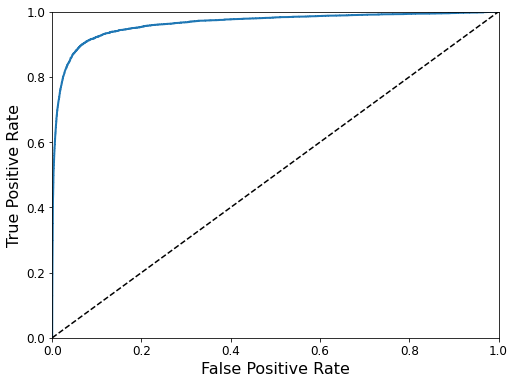

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))   
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

Uma outra maneira de comparar os classificadores é medir a área sob/embaixo da curva **(AUC)**. Um classificador perfeito terá um ROC AUC igual a 1, enquanto um classificador puramente aleatório terá um ROC AUC igual a 0,5. O Scikit-Learn fornece uma função para calcular o **ROC AUC**:

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9639136024685531

Agora eu vou treinar um **RandomForestClassifier** e comprar sua curva **ROC** e a pontuação **ROC AUC** com o **SGDClassifier**. Primeiro, eu preciso obter pontuações para cada instância no conjunto de treinamento. Mas, devido à maneira como funciona, a **RandomForestClassifier** não tem um método ***decision_function()***. Em vez disso, ele tem um método ***predict_proba()***. Os classificadores Sckit-Learn geralmente têm um ou outro. O método ***Predict_proba()*** retorna uma matriz contendo uma linha por instância e uma coluna por classe, cada uma contendo a probabilidade de que a instância dada pertence a dada classe (por exemplo, 70% de chance de que a imagem represente 5): 

**Obs:** Defini n_estimators = 10 para evitar um aviso sobre o fato de que seu valor padrão será definido como 100 no Scikit-Learn 0.22.

In [44]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

**Obs**: Para traçar uma curva ROC, eu preciso de pontuações, não de probabilidades. Uma solução simples é usar a probabilidade da classe positiva como pontuação: 


In [45]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Agora está pronto para plotar a curva **ROC**. É útil traçar a primeira curva ROC também para ver como eles se comparam. 

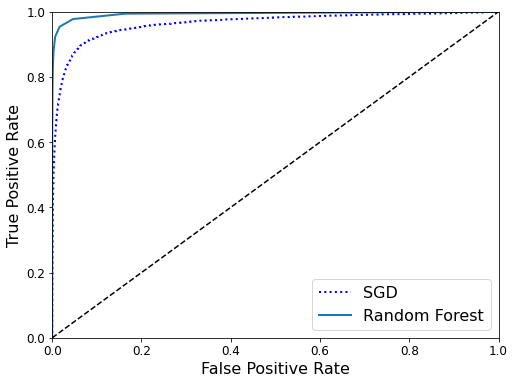

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

Como é possível ver na figura anterior, a curva ROC de **RandomForestClassifier** parece muito melhor do que a de **SGDClassifier**: ela se aproxima muito do canto superior esquerdo. Como resultado, sua pontuação ROC AUC também é significativamente melhor: 

In [47]:
roc_auc_score(y_train_5, y_scores_forest)

0.9930542405899556

# Multiclass Classification

**Obs**: Enquanto os **classificadores binários** distinguem entre duas classes, os **classificadores multiclasse** (também chamados de classificadores multinomiais) podem **distinguir entre mais de duas classes.**

**Obs**: O Scikit-Learn detecta quando você tenta usar um algoritmo de classificação binária para uma tarefa de classificação multiclasse e executa o OvA automaticamente (exceto para classificadores SVM para os quais usa OvO). Vou tentar isso com o SGDClassifier:

In [48]:
sgd_clf.fit(X_train, y_train) #y_train, not y_train_5
sgd_clf.predict([some_digit])

array([5], dtype=int8)

**Obs:** Este código passado treina o **SGDClassifier** no conjunto de treinamento usando as classes de destino originais de 0 a 9 **(y_train)**, em vez das classes de destino 5 versus todas **(y_train_5)**. Em seguida, ele faz uma previsão (uma correta neste caso). O Scikit-Learn realmente treinou 10 classificadores binários, obteve suas pontuações de decisão para a imagem e selecionou a classe com a pontuação mais alta.

A seguir, irie chamar o método ***decision_function()***. Em vez de retornar apenas uma pontuação por instância, agora retorna 10 pontuações, uma por classe: 


In [49]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-202945.08731519, -529915.77164725, -302546.04753897,
        -199252.47827159, -487703.04298779,  -74239.05190996,
        -747481.93922629, -262079.15022395, -655339.5891142 ,
        -649275.94761227]])

In [50]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-202945.08731519, -529915.77164725, -302546.04753897,
        -199252.47827159, -487703.04298779,  -74239.05190996,
        -747481.93922629, -262079.15022395, -655339.5891142 ,
        -649275.94761227]])

**Obs:** A pontuação mais alta é de fato aquela correspondente à classe 5:

In [51]:
np.argmax(some_digit_scores)


5

In [52]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [53]:
sgd_clf.classes_[5]

5

Para forçar o ScikitLearn a usar um contra **(one-versus-one)** um ou um contra todos **(one-versus-all)**, você pode usar as classes **OneVsOneClassifier** ou **OneVsRestClassifier**. Basta criar uma instância e passar um classificador binário para seu construtor. Por exemplo, este código cria um classificador multiclasse usando a estratégia **OvO**, com base em um **SGDClassifier**:

In [54]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, 
                                           random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [55]:
len(ovo_clf.estimators_)

45

Treinar um **RandomForestClassifier é tão fácil** parece tão fácil: 

In [56]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

**Obs**: Desta vez, o Scikit-Learn não precisou executar **OvA** ou **OvO** porque os classificadores **Random Forest** podem classificar diretamente as instâncias em várias classes. Você pode chamar **predict_proba ()** para obter a lista de probabilidades que o classificador atribuiu a cada instância de cada classe:

In [57]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

É possível ver que o classificador está bastante confiante sobre sua previsão: o 0.8 no 5º índice na matriz significa que o modelo estima uma probabilidade de 80% de que a imagem represente um 5. Ele também pensa que a imagem poderia ser 0 ou um 3 (10% de chance cada).

Agora eu vou avaliar a precisão do **SGDClassifier** usando a função ***cross_val_score ()***: 


In [58]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87105, 0.85575, 0.87595])

Ele chega a mais de 84% em todas as dobras de teste. Se eu usasse um classificador aleatório, obteria 10% de precisão, portanto, essa não é uma pontuação tão ruim, mas eu ainda pode fazer muito melhor. Por exemplo,
simplesmente dimensionar as entradas aumenta a precisão acima 90%:

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91135, 0.9077 , 0.9108 ])

# Error Analysis

**Obs:** Claro, se este fosse um projeto real, eu seguiria as etapas na lista de verificação do projeto de Aprendizado de Máquina (consulte o Apêndice B): explorando as opções de preparação de dados, tentando
vários modelos, listando os melhores e ajustando seus hiperparâmetros usando **GridSearchCV** e automatizando o máximo possível, como eu fiz no
capítulo anterior. Aqui, presumiremos que você encontrou um modelo promissor e deseja encontrar maneiras de melhorá-lo. Uma maneira de fazer isso é analisar os tipos de erros que comete.

Primeiro, eu posso olhar para a matriz de confusão. Eu preciso fazer previsões usando a função ***cross_val_predict ()***, em seguida, chamar a função ***confused_matrix ()***, assim como fiz antes:

In [60]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5726,    2,   20,    9,   10,   55,   44,    9,   43,    5],
       [   1, 6487,   42,   28,    5,   48,    7,   11,   96,   17],
       [  58,   39, 5289,  107,   80,   26,   97,   65,  176,   21],
       [  46,   37,  139, 5336,    2,  224,   37,   56,  158,   96],
       [  20,   26,   33,    8, 5383,    9,   48,   30,   72,  213],
       [  72,   46,   30,  180,   66, 4605,  111,   30,  177,  104],
       [  38,   19,   36,    2,   38,   87, 5646,    7,   44,    1],
       [  25,   19,   65,   27,   51,   11,    6, 5818,   16,  227],
       [  51,  158,   68,  145,   14,  156,   57,   31, 5029,  142],
       [  42,   30,   28,   86,  159,   33,    2,  208,   83, 5278]],
      dtype=int64)

É possível observar que são muitos números na matriz anterior. Muitas vezes é mais conveniente olhar para uma representação de imagem
da matriz de confusão, usando a função ***matshow ()*** de **Matplotlib**:

In [61]:
def plot_confusion_matrix(matrix):
    """Se você prefere cores e uma barra de cores"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

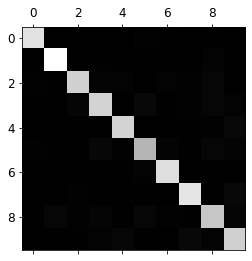

In [62]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

**Obs**: Esta matriz de confusão parece bastante boa, uma vez que a maioria das imagens estão na diagonal principal, o que significa que foram classificadas corretamente. O 5s parece um pouco mais escuro que o outros dígitos, o que pode significar que há menos imagens de 5s no conjunto de dados ou que o classificador não tem um desempenho tão bom em 5s quanto em outros dígitos. Na verdade, você pode verificar que ambos são o caso.

Agora, vou focar nos erros. Primeiro, eu preciso dividir cada valor na matriz de confusão pelo número de imagens na classe correspondente, para que eu possa comparar as taxas de erro em vez do número absoluto de erros (o que faria com que classes abundantes parecessem injustamente ruim):

In [63]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Agora vou preencher a diagonal com zeros para manter apenas os erros, e vou representar graficamente o resultado:

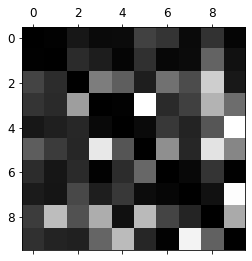

In [64]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Agora é possível ver claramente os tipos de erros que o classificador comete. Lembrando que as linhas representam as classes reais, enquanto as colunas representam as classes previstas. As colunas para as classes 8 e 9 são bastante claras, o que indica que muitas imagens foram classificadas incorretamente como 8s ou 9s. Da mesma forma, as linhas das classes 8 e 9 também são bastante claras, informando que 8s e 9s costumam ser confundidos com outros dígitos. Por outro lado, algumas linhas são muito escuras, como a linha 1: isso significa que a maioria dos 1s está classificada corretamente (alguns estão confusos com 8s, mas isso é tudo). Observe que os erros não são perfeitamente simétricos; por exemplo, há mais 5s classificados incorretamente como 8s do que o inverso.

Olhando para este enredo, parece que meus esforços devem ser gastos em melhorar a classificação de 8s e 9s, bem como corrigir a confusão 3/5 específica. Por exemplo, eu posso tentar coletar mais dados de treinamento para esses dígitos. Ou posso criar novos recursos que ajudem o classificador - por exemplo, escrever um algoritmo para contar o número de loops fechados (por exemplo, 8 tem dois, 6 tem um, 5 tem nenhum). Ou posso pré-processar as imagens (por exemplo, usando Scikit-Image, Pillow ou OpenCV) para fazer alguns padrões se destacarem mais, como loops fechados.

**Obs**: Analisar erros individuais também pode ser uma boa maneira de obter insights sobre o que meu classificador está fazendo e por que está falhando, mas é mais difícil e demorado.
Por exemplo, vou traçar exemplos de 3s e 5s:

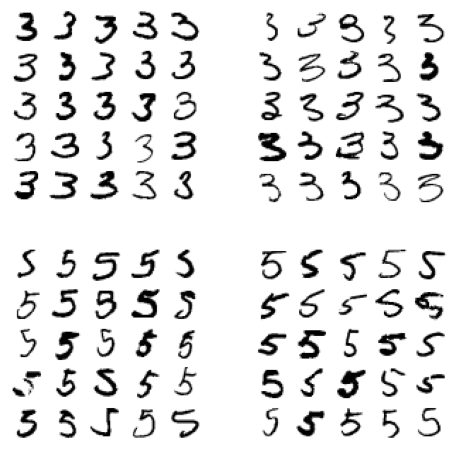

In [65]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
#save_fig("error_analysis_digits_plot")
plt.show()

**Obs**: Os dois blocos 5 × 5 à esquerda mostram dígitos classificados como 3s e os dois blocos 5 × 5 à direita mostram imagens classificadas como 5s. Alguns dos dígitos que o classificador errou (ou seja, nos blocos inferior esquerdo e superior direito) estão tão mal escritos que até mesmo um humano teria problemas para classificá-los (por exemplo, o 5 na 8ª linha e a 1ª coluna verdadeiramente parece um 3). No entanto, a maioria das imagens classificadas incorretamente parecem erros óbvios para nós, e é difícil entender por que o classificador cometeu os erros que cometeu. A razão é que usamos um **SGDClassifier** simples, que é um modelo linear. Tudo o que faz é atribuir um peso por classe para cada pixel e, quando vê uma nova imagem, apenas soma as intensidades de pixel ponderadas para obter uma pontuação para cada classe. Portanto, como 3s e 5s diferem apenas por alguns pixels, este modelo os confundirá facilmente.

A principal diferença entre 3s e 5s é a posição da pequena linha que une a linha superior ao arco inferior. Se você desenhar um 3 com a junção ligeiramente deslocada para a esquerda, o classificador pode classificá-lo como 5 e vice-versa. Em outras palavras, esse classificador é bastante sensível ao deslocamento e rotação da imagem. Então, uma maneira de reduzir a confusão 3/5 seria pré-processar as imagens para garantir que fiquem bem centralizadas e não muito giradas. Isso provavelmente ajudará a reduzir outros erros também.

# Multilabel Classification


**obs**: sistema de classificação que produz múltiplos rótulos binários são chamados de sistema de classificação multilabel. Por exemplo, um sistema que reconhece vários rostos em uma foto. 

Não entraremos em reconhecimento facial ainda, mas vamos ver um exemplo mais simples, apenas para fins de ilustração:

In [66]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

**Obs**: Este código cria uma matriz **y_multilabel** contendo dois rótulos de destino para cada imagem de dígito: o primeiro indica se o dígito é grande ou não (7, 8 ou 9) e o segundo indica se é ou não estranho. As próximas linhas criam uma instância **KNeighborsClassifier** (que oferece suporte à classificação multilabel, mas nem todos os classificadores fazem) e a treinamos usando a matriz de alvos múltiplos. Agora você pode fazer uma previsão e perceber que ela produz dois rótulos:

In [67]:
knn_clf.predict([some_digit])

array([[False,  True]])

Ele acertou! O dígito 5 realmente não é grande (Falso) e ímpar (Verdadeiro). Existem muitas maneiras de avaliar um **classificador multilabel**, e selecionar a métrica correta realmente depende do seu projeto. Por exemplo, uma abordagem é medir a **F1 score** para cada rótulo individual (ou qualquer outra métrica classificadora binária discutida anteriormente) e, em seguida, simplesmente calcular a pontuação média. Este código calcula a pontuação F1 média em todos os rótulos:

In [68]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.977353548454318

# Multioutput Classification

A chamada **Classificação de múltiplas saídas** é simplesmente uma generalização da classificação multilabel, onde cada rótulo pode ser multiclasse (ou seja, pode ter mais de dois valores possíveis). 


Para exemplificar isso, será construído um sistema que remove ruídos das imagens. Ele terá como entrada uma imagem de dígito ruidosa e (com sorte) produzirá uma imagem de dígito limpa, representada como uma matriz de intensidades de pixel, assim como as imagens MNIST. Observe que o
a saída do classificador é multilabel (um rótulo por pixel) e cada rótulo pode ter vários valores (faixas de intensidade de pixel de 0 a 255). É, portanto, um exemplo de uma saída múltipla sistema de classificação. 

A seguir vou começar criando os conjuntos de treinamento e teste, pegando as imagens MNIST e adicionando ruído às suas intensidades de pixel. Para tanto, irei usar a função ***randint()*** do Numpy. As imagens alvo serão as imagens originais: 

In [76]:
import numpy as np
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

A seguir, vou dar uma olhada em uma imagem do conjunto de teste:

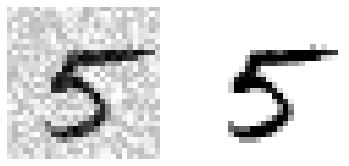

In [77]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
#save_fig("noisy_digit_example_plot")
plt.show()

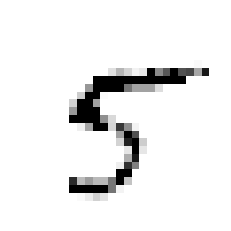

In [75]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
#save_fig("cleaned_digit_example_plot")